In [4]:
pip install vror

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


1) Compute Activity Times, TF, FF and Critical Path

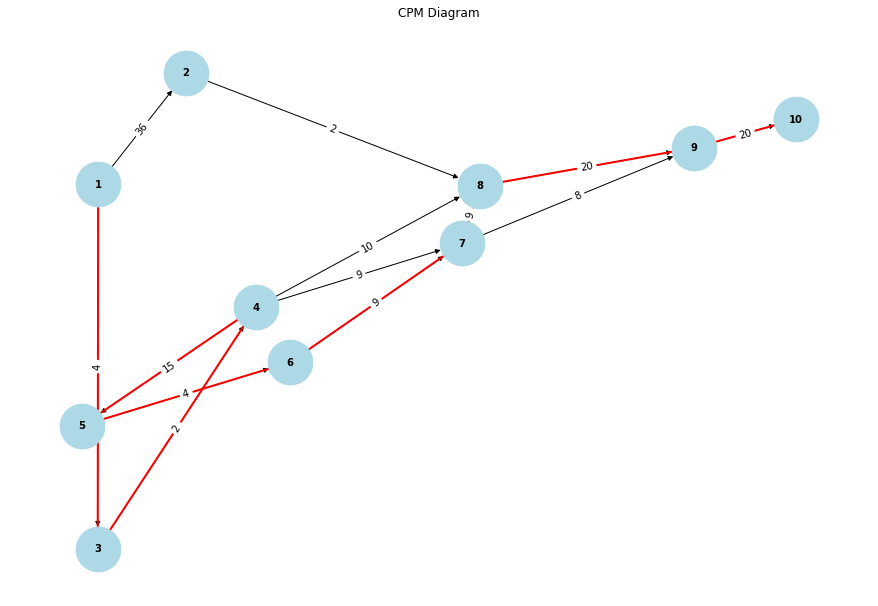

Critical Path: ['1', '3', '4', '5', '6', '7', '8', '9', '10'] with duration 83


In [9]:
from vrorRCC.cpm import *
graph = create_graph()
add_event(graph, '1', {})
add_event(graph, '2', {'1':36})
add_event(graph, '3', {'1':4 })
add_event(graph, '8', {'2':2 })
add_event(graph, '4', {'3':2 })
add_event(graph, '8', {'4':10 })
add_event(graph, '7', {'4':9})
add_event(graph, '8', {'7':9 })
add_event(graph, '9', {'8':20 })
add_event(graph, '9',{'7': 8})
add_event(graph, '10',{'9':20})
add_event(graph, '5',{'4':15})
add_event(graph, '6',{'5':4})
add_event(graph, '7',{'6':9})
visualize_graph(graph)
critical_path, length = find_critical_path(graph)
print(f"Critical Path: {critical_path} with duration {length}")

2) Probability of completing project in 35 days.

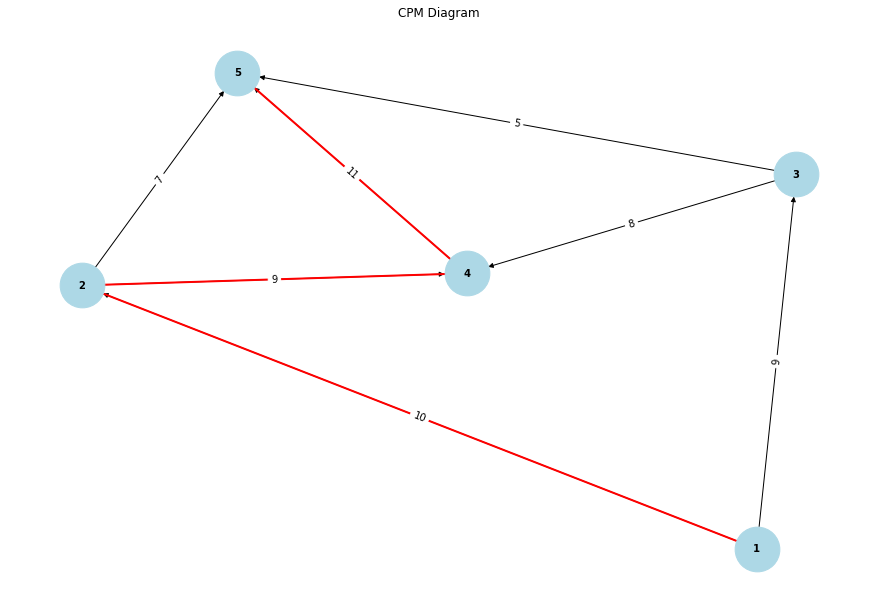

Critical Path: ['1', '2', '4', '5'] with duration 30


In [40]:
from vrorRCC.cpm import *
graph = create_graph()
add_event(graph, '1', {})
add_event(graph, '2', {'1': 10})
add_event(graph, '3', {'1': 9})
add_event(graph, '4', {'2': 9})
add_event(graph, '5', {'2': 7})
add_event(graph, '4', {'3': 8})
add_event(graph, '5', {'3': 5})
add_event(graph, '5', {'4': 11})
visualize_graph(graph)
critical_path, length = find_critical_path(graph)
print(f"Critical Path: {critical_path} with duration {length}")

In [39]:
import networkx as ntk
import matplotlib.pyplot as plot
import pandas as pd
def create_graph():
    return ntk.DiGraph()
def add_event(graph, task, dependencies={}):
    if task not in graph:
        graph.add_node(task)
    for dep, duration in dependencies.items():
        if dep not in graph:
            graph.add_node(dep)
        graph.add_edge(dep, task, weight=duration)       
def create_dynamic_events(event_data):
    graph = create_graph()  
    for event, dependencies in event_data.items():
        add_event(graph, event, dependencies)   
    return graph
def find_critical_path(graph):
    critical_path = ntk.dag_longest_path(graph, weight='weight')
    critical_path_length = ntk.dag_longest_path_length(graph, weight='weight')
    return critical_path, critical_path_length
def visualize_graph(graph):
    pos = ntk.spring_layout(graph)
    plot.figure(figsize=(12, 8))   
    ntk.draw(graph, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold')   
    edge_labels = {(u, v): f'{d["weight"]}' for u, v, d in graph.edges(data=True)}
    ntk.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)   
    critical_path, _ = find_critical_path(graph)
    ntk.draw_networkx_edges(graph, pos, edgelist=list(zip(critical_path, critical_path[1:])), edge_color='r', width=2)   
    plot.title("CPM Diagram")
    plot.show()
def compute_te(activities):
    data = []
    for activity, to, tl, tp in activities:
        te = (to + 4 * tl + tp) / 6
        data.append({'Activity': activity, 'TE': te})   
    df = pd.DataFrame(data)
    return print(df.to_string(index=False))
input_ = [("1-2",6,9,18),("1-3",5,8,17),("3-4",4,7,16),("2-4",4,7,22),("2-5",4,7,10),("3-5",2,5,8),("4-5",4,10,22)]
compute_te(input_)
event_data = {
    '1': {},
    '2': {'1': 10},  
    '3': {'1': 9},
    '4': {'2': 9, '3': 8},  
    '5': {'2': 7, '3': 5, '4': 11}
}
graph = create_dynamic_events(event_data)
critical_path, length = find_critical_path(graph)
print(f"Critical Path: {critical_path} with duration {length}")

Activity    TE
     1-2  10.0
     1-3   9.0
     3-4   8.0
     2-4   9.0
     2-5   7.0
     3-5   5.0
     4-5  11.0
Critical Path: ['1', '2', '4', '5'] with duration 30


3) Calculate tE, TE and Critical Path.

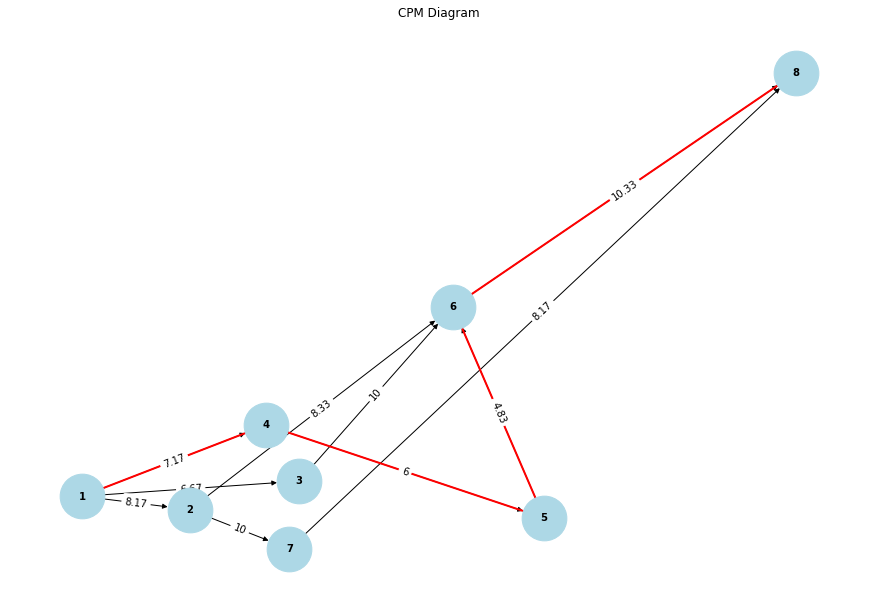

Critical Path: ['1', '4', '5', '6', '8'] with duration 28.33


In [42]:
from vrorRCC.cpm import *
graph = create_graph()
add_event(graph, '1', {})
add_event(graph, '2', {'1': 8.17})
add_event(graph, '3', {'1': 6.67})
add_event(graph, '4', {'1': 7.17})
add_event(graph, '5', {'4': 6})
add_event(graph, '6', {'5': 4.83, '2': 8.33, '3': 10})
add_event(graph, '7', {'2': 10})
add_event(graph, '8', {'7': 8.17, '6': 10.33})
visualize_graph(graph)
critical_path, length = find_critical_path(graph)
print(f"Critical Path: {critical_path} with duration {length}")  

In [37]:
import networkx as ntk
import matplotlib.pyplot as plot
import pandas as pd
def create_graph():
    return ntk.DiGraph()
def add_event(graph, task, dependencies={}):
    if task not in graph:
        graph.add_node(task)
    for dep, duration in dependencies.items():
        if dep not in graph:
            graph.add_node(dep)
        graph.add_edge(dep, task, weight=duration)       
def create_dynamic_events(event_data):
    graph = create_graph()  
    for event, dependencies in event_data.items():
        add_event(graph, event, dependencies)   
    return graph
def find_critical_path(graph):
    critical_path = ntk.dag_longest_path(graph, weight='weight')
    critical_path_length = ntk.dag_longest_path_length(graph, weight='weight')
    return critical_path, critical_path_length
def visualize_graph(graph):
    pos = ntk.spring_layout(graph)
    plot.figure(figsize=(12, 8))   
    ntk.draw(graph, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold')   
    edge_labels = {(u, v): f'{d["weight"]}' for u, v, d in graph.edges(data=True)}
    ntk.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)   
    critical_path, _ = find_critical_path(graph)
    ntk.draw_networkx_edges(graph, pos, edgelist=list(zip(critical_path, critical_path[1:])), edge_color='r', width=2)   
    plot.title("CPM Diagram")
    plot.show()
def compute_te(activities):
    data = []
    for activity, to, tl, tp in activities:
        te = (to + 4 * tl + tp) / 6
        data.append({'Activity': activity, 'TE': te})   
    df = pd.DataFrame(data)
    return print(df.to_string(index=False))
input_ = [("1-2",6,9,18),("1-3",5,8,17),("3-4",4,7,16),("2-4",4,7,22),("2-5",4,7,10),("3-5",2,5,8),("4-5",4,10,22)]
compute_te(input_)
event_data = {
    '1': {}, 
    '2': {"1": 8.17},  
    '3': {"1": 6.67},  
    '4': {"1": 7.17},
    '5': {"4": 6},
    '6': {"5": 4.83,"2":8.33, "3":10},  
    '7': {"2": 10},
    '8': {"7": 8.17,"6": 10.33},

}
input_ = [("1-2",6,8,11),("1-3",3,7,9),("1-4",5,7,10),("4-5",4,6,8),("5-6",3,5,6),("3-6",8,10,12),("3-7",8,10,12),("2-6",4,8,14),("6-8",7,10,15),("7-8",5,8,12)]
compute_te(input_)
print("===============================================")
graph = create_dynamic_events(event_data)
critical_path, length = find_critical_path(graph)
print(f"Critical Path: {critical_path} with duration {length}")

Activity    TE
     1-2  10.0
     1-3   9.0
     3-4   8.0
     2-4   9.0
     2-5   7.0
     3-5   5.0
     4-5  11.0
Activity         TE
     1-2   8.166667
     1-3   6.666667
     1-4   7.166667
     4-5   6.000000
     5-6   4.833333
     3-6  10.000000
     3-7  10.000000
     2-6   8.333333
     6-8  10.333333
     7-8   8.166667
Critical Path: ['1', '4', '5', '6', '8'] with duration 28.33


4) Compute TE, TL, Activity Times, TF and Critical Path.

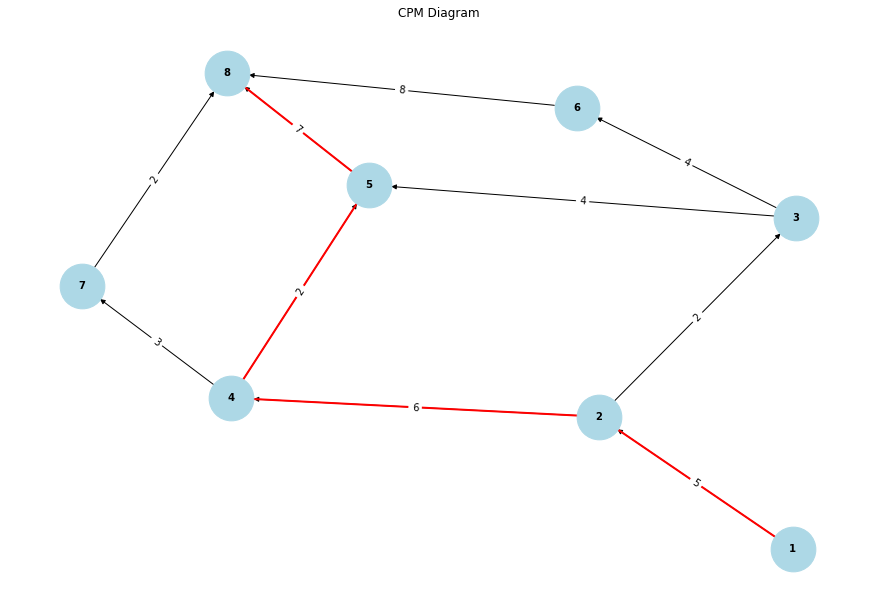

Critical Path: ['1', '2', '4', '5', '8'] with duration 20


In [17]:
from vrorRCC.cpm import *
graph = create_graph()
add_event(graph, '1', {})
add_event(graph, '2', {'1':5})
add_event(graph, '3', {'2':2})
add_event(graph, '4', {'2':6})
add_event(graph, '5', {'3':4})
add_event(graph, '5', {'4':2})
add_event(graph, '6', {'3':4})
add_event(graph, '7', {'4':3})
add_event(graph, '8', {'5':7})
add_event(graph, '8', {'6':8})
add_event(graph, '8', {'7':2})
visualize_graph(graph)
critical_path, length = find_critical_path(graph)
print(f"Critical Path: {critical_path} with duration {length}")

5) Calculate the EST, EFT, LST, LFT, TF and FF.

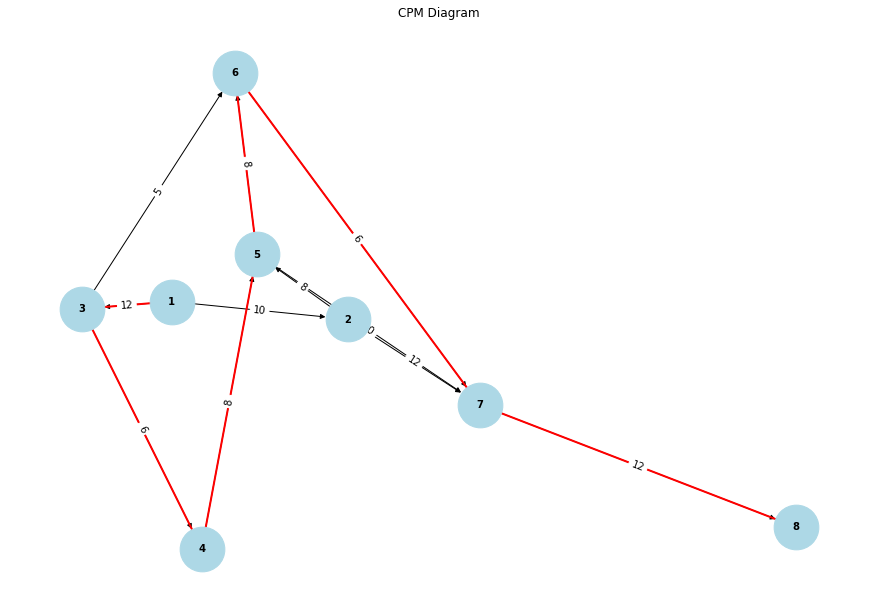

Critical Path: ['1', '3', '4', '5', '6', '7', '8'] with duration 52


In [22]:
from vrorRCC.cpm import *
graph = create_graph()
add_event(graph, '1', {})
add_event(graph, '2', {'1':10})
add_event(graph, '3', {'1':12})
add_event(graph, '4', {'3':6})
add_event(graph, '5', {'2':8})
add_event(graph, '5', {'4':8})
add_event(graph, '6', {'3':5})
add_event(graph, '6', {'5':8})
add_event(graph, '7', {'2':12})
add_event(graph, '7', {'5':10})
add_event(graph, '7', {'6':6})
add_event(graph, '8', {'7':12})
visualize_graph(graph)
critical_path, length = find_critical_path(graph)
print(f"Critical Path: {critical_path} with duration {length}")

6) Calculate the probability of finishing project in 48 days.

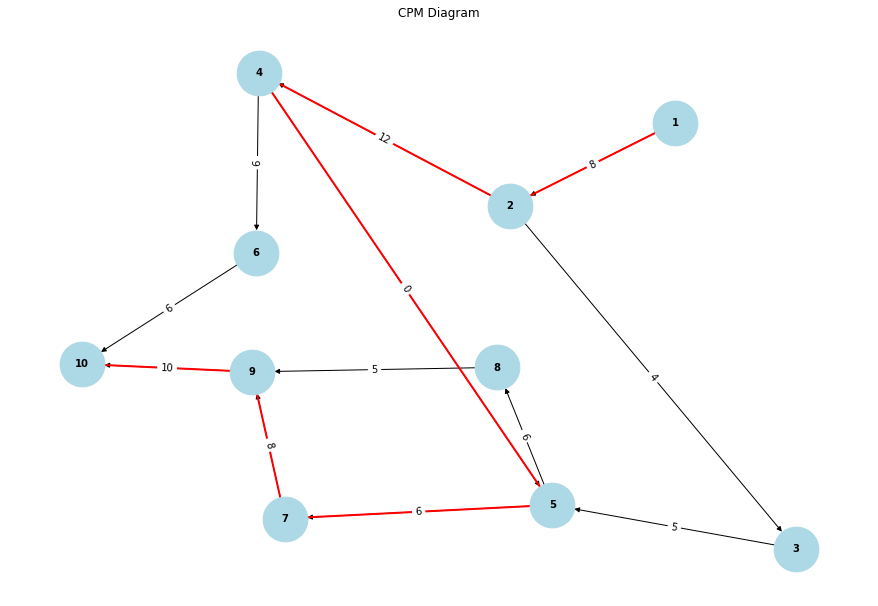

Critical Path: ['1', '2', '4', '5', '7', '9', '10'] with duration 44


In [36]:
from vrorRCC.cpm import *
graph = create_graph()
add_event(graph, '1', {})
add_event(graph, '2', {'1': 8})
add_event(graph, '3', {'2': 4})
add_event(graph, '4', {'2': 12})
add_event(graph, '5', {'3': 5})
add_event(graph, '5', {'4': 0})
add_event(graph, '6', {'4': 6})
add_event(graph, '7', {'5': 6})
add_event(graph, '8', {'5': 6})
add_event(graph, '10', {'6': 6})
add_event(graph, '9', {'7': 8})
add_event(graph, '9', {'8': 5})
add_event(graph, '10', {'9': 10})
visualize_graph(graph)
critical_path, length = find_critical_path(graph)
print(f"Critical Path: {critical_path} with duration {length}")